In [1]:
import numpy as np
import pandas as pd
import earthscopestraintools
import math
import importlib
from importlib.resources import files
importlib.reload(earthscopestraintools)
from earthscopestraintools.tiledbtools import RawStrainWriter, RawStrainReader
from earthscopestraintools.mseed_tools import load_mseed_to_df, mseed2pandas
from earthscopestraintools.gtsm_metadata import GtsmMetadata, get_metadata_df, get_fdsn_network
from earthscopestraintools.timeseries import ts_from_mseed, Timeseries
from earthscopestraintools.processing import decimate_1s_to_300s, butterworth_filter, interpolate, linearize
from earthscopestraintools.event import Earthquake
from earthscopestraintools.event_processing import magnitude_plot, plot_coseismic_offset, calc_hypocentral_dist, get_stations_in_radius
from datetime import datetime, timedelta

import logging
logger = logging.getLogger()
logging.basicConfig(
        format="%(message)s", level=logging.INFO
    )

In [2]:
eq = Earthquake(event_id = "us7000jiky")
radius = 500
print(f"USGS Magnitude {eq.mag} at {eq.time}, looking for stations within {radius} km.") 
stations = get_stations_in_radius(eq.lat, eq.long, eq.depth, radius, print_it=True)

USGS Magnitude 4.6 at 2023-03-09 19:08:07.085000+00:00, looking for stations within 500 km.
TSM1 at 25 km
TSM2 at 21 km
TSM3 at 15 km
TSM4 at 10 km
TSM5 at 33 km
TSM6 at 23 km


In [14]:
def plot_event(station, meta, eq):
    period = 20
    #eq = Earthquake(event_id=event_id)
    hypocentral_distance = calc_hypocentral_dist(eq.lat,
                                                 eq.long,
                                                 eq.depth,
                                                 meta.latitude,
                                                 meta.longitude)
    start = (eq.time - timedelta(seconds=15)).strftime("%Y-%m-%dT%H:%M:%S")
    end = (eq.time + timedelta(seconds=120)).strftime("%Y-%m-%dT%H:%M:%S")
    ts1 = ts_from_mseed(network=network, station=station, location='T0', channel='BS*', start=start, end=end)
    #ts1.plot()
    ts2 = ts1.linearize(reference_strains=meta.reference_strains, gap=meta.gap)
    #ts2.plot()
    ts3 = ts2.interpolate(method='linear', limit_seconds=3600)
    #ts3.plot()
    ts4 = ts3.butterworth_filter(filter_type='high', filter_order=2, filter_cutoff_s=1000)
    #ts4.plot()
    ts5 = ts4.dynamic_strain()
    #ts5.plot()
    ts6 = ts5.calculate_magnitude(hypocentral_distance, meta.site_term, meta.longitude_term)
    title = f"{network}.{station} at {hypocentral_distance} km from {eq.name}"
    magnitude_plot(dynamic_strain_df=ts5.data, 
               magnitude_df=ts6.data, 
               eq_time=eq.time, 
               eq_mag=eq.mag, 
               title=title)

Loading T0 BS* from 2023-03-09T19:07:52 to 2023-03-09T19:10:07 from IRIS DMC miniseed


IV.TSM1 at 25 km from us7000jiky


    Trace 1. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS1 to CH0
    Trace 2. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS2 to CH1
    Trace 3. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS3 to CH2
    Trace 4. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS4 to CH3
    Found 0 epochs with nans, 16.25 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.6%
Converting missing data from 999999 to nan
    Found 16 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.59%
Converting raw counts to microstrain
    Found 16 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.59%
Interpolating data using method=linear and limit=72000
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Applying Butterworth Filter
    Found 0 epochs with nans, 0.0 epochs with 9

IV.TSM2 at 25 km from us7000jiky


    Trace 1. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS1 to CH0
    Trace 2. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS2 to CH1
    Trace 3. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS3 to CH2
    Trace 4. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS4 to CH3
    Found 0 epochs with nans, 10.5 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.39%
Converting missing data from 999999 to nan
    Found 10 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.37%
Converting raw counts to microstrain
    Found 10 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.37%
Interpolating data using method=linear and limit=72000
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Applying Butterworth Filter
    Found 0 epochs with nans, 0.0 epochs with 9

IV.TSM3 at 25 km from us7000jiky


    Trace 1. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS1 to CH0
    Trace 2. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS2 to CH1
    Trace 3. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS3 to CH2
    Trace 4. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS4 to CH3
    Found 0 epochs with nans, 17.75 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.66%
Converting missing data from 999999 to nan
    Found 17 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.63%
Converting raw counts to microstrain
    Found 17 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.63%
Interpolating data using method=linear and limit=72000
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Applying Butterworth Filter
    Found 0 epochs with nans, 0.0 epochs with 

IV.TSM4 at 25 km from us7000jiky


No data found for specified query https://service.iris.edu/fdsnws/dataselect/1/query?net=IV&sta=TSM4&loc=T0&cha=BS*&starttime=2023-03-09T19:07:52&endtime=2023-03-09T19:10:07&format=miniseed&nodata=404
Loading T0 BS* from 2023-03-09T19:07:52 to 2023-03-09T19:10:07 from IRIS DMC miniseed


IV.TSM5 at 25 km from us7000jiky


No data found for specified query https://service.iris.edu/fdsnws/dataselect/1/query?net=IV&sta=TSM5&loc=T0&cha=BS*&starttime=2023-03-09T19:07:52&endtime=2023-03-09T19:10:07&format=miniseed&nodata=404
Loading T0 BS* from 2023-03-09T19:07:52 to 2023-03-09T19:10:07 from IRIS DMC miniseed


IV.TSM6 at 25 km from us7000jiky


    Trace 1. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS1 to CH0
    Trace 2. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS2 to CH1
    Trace 3. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS3 to CH2
    Trace 4. 2023-03-09T19:07:52.000000Z:2023-03-09T19:10:07.000000Z mapping BS4 to CH3
    Found 0 epochs with nans, 6.5 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.24%
Converting missing data from 999999 to nan
    Found 6 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.22%
Converting raw counts to microstrain
    Found 6 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.22%
Interpolating data using method=linear and limit=72000
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Applying Butterworth Filter
    Found 0 epochs with nans, 0.0 epochs with 9999

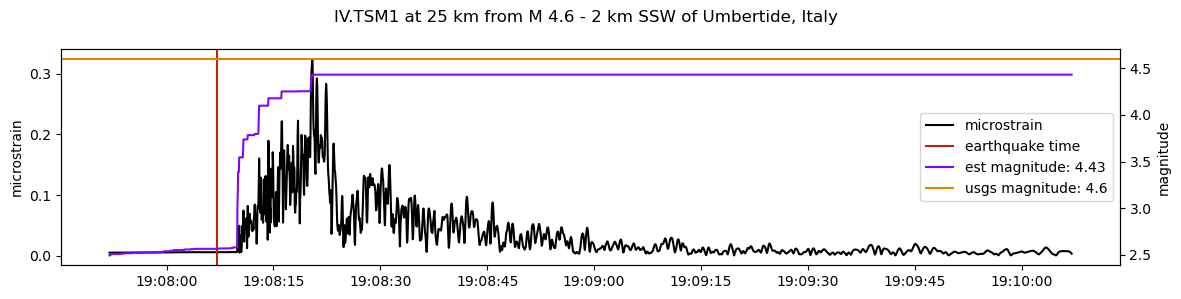

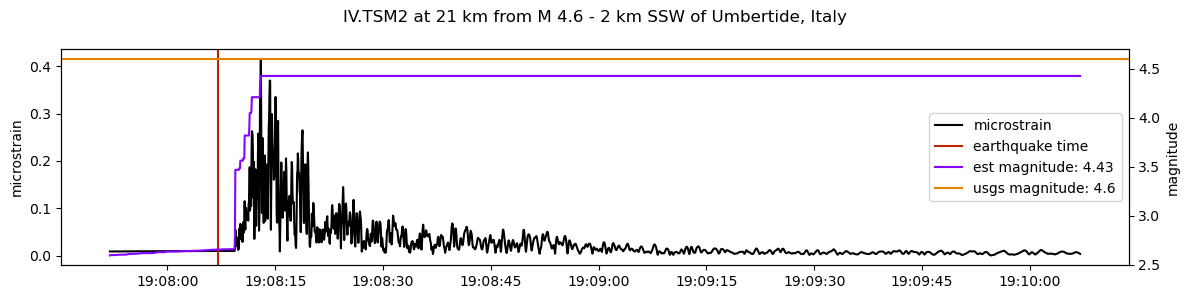

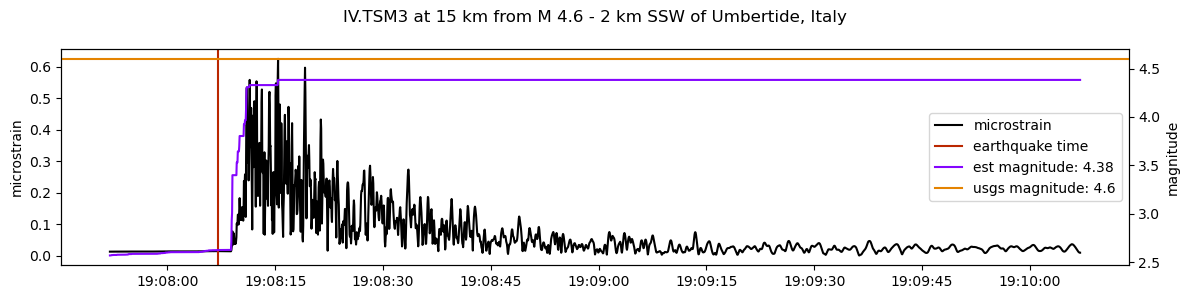

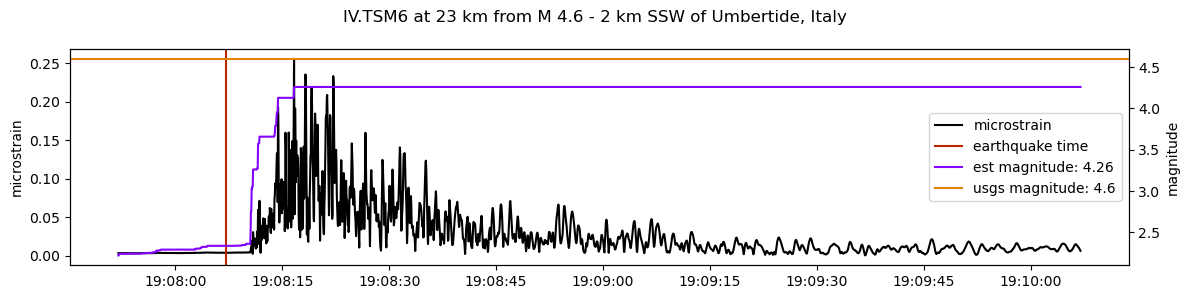

In [16]:
for station in stations:
    try:
        network = get_fdsn_network(station) #requires vpn to access datasource identifiers
        meta = GtsmMetadata(network, station)
        print(f"{network}.{station} at {hypocentral_distance} km from {eq.event_id}") 
        meta.get_event_terms()
        plot_event(station, meta, eq)
    except:
        pass